In [1]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

import plotly.graph_objects as go


In [2]:
explict = pd.read_csv("data/en/explicit_ratings_en.csv")
implicit = pd.read_csv("data/en/implicit_ratings_en.csv")
item = pd.read_csv("data/en/items_en.csv")
user = pd.read_csv("data/en/users_en.csv")

In [3]:
explict

,user_id,item_id,watch_percentage,created_at,rating
0,224557,510,100,2018-09-28 16:18:29,10
1,224557,615,100,2018-09-28 16:22:22,10
2,224557,7680,100,2018-09-28 16:23:34,10
3,224293,510,100,2018-09-28 17:20:30,10
4,224293,515,100,2018-09-28 17:40:02,10
...,...,...,...,...,...
3654,605220,376915,100,2021-07-30 16:48:48,10
3655,605220,376916,100,2021-07-30 16:50:28,10
3656,605220,376924,100,2021-07-30 16:53:11,10
3657,605220,376925,100,2021-07-30 16:54:43,10


In [4]:
item

,item_id,language,name,nb_views,description,created_at,Difficulty,Job,Software,Theme,duration,type
0,510,en,What is OneDrive for Business?,1114.0,OneDrive for Businessis an online libraryto st...,2016,Beginner,[],['OneDrive'],['Discover'],42.0,tutorial
1,511,en,"Add, restore, delete documents on OneDrive",547.0,"To create a new document in OneDriveclick New,...",2016,Beginner,[],['OneDrive'],"['Share', 'Produce', 'Organize']",122.0,tutorial
2,512,en,Share documents,607.0,"By default, all content is private, so you don...",2016,Beginner,[],['OneDrive'],"['Share', 'Collaborate']",176.0,tutorial
3,513,en,Recycle bin,278.0,"When you delete a file or afolder, OneDrive gi...",2016,Beginner,"['Accounting', 'Financial', 'Human resources',...",['OneDrive'],"['Produce', 'Organize']",46.0,tutorial
4,514,en,Sync OneDrive for Business to your computer (W...,312.0,The one drive synchronization application is a...,2016,Beginner,[],['OneDrive'],"['Produce', 'Organize']",163.0,tutorial
...,...,...,...,...,...,...,...,...,...,...,...,...
1162,422593,en,Create custom fields,22.0,NaN,2021,NaN,[],['Bookings'],"['Produce', 'Customize']",81.0,tutorial
1163,422594,en,Make a reservation [Customer],22.0,NaN,2021,NaN,[],['Bookings'],['Produce'],133.0,tutorial
1164,422595,en,Make a reservation [Staff],19.0,NaN,2021,NaN,[],['Bookings'],['Produce'],115.0,tutorial
1165,422596,en,Manage your availabilities,19.0,NaN,2021,NaN,[],['Bookings'],['Organize'],102.0,tutorial


## EDA + FE

In [12]:
nb_watch = implicit.groupby("user_id")['item_id'].count().reset_index(name='nb_watch')
nb_watch_item = explict.merge(nb_watch, on='user_id', how='inner')
user_item = explict.merge(item[['item_id','nb_views']],on='item_id',how='inner')
agg_ratings = user_item.groupby('item_id').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()
item_ratings = user_item.groupby('item_id').agg(mean_rating = ('rating', 'mean'),
                                                nb_item_ratings = ('rating', 'count')).reset_index()

user_rating = user_item.groupby('user_id').agg(
                                                nb_user_ratings = ('rating', 'count')).reset_index()
user_item_rating = user_item[['user_id','item_id','nb_views','rating']].merge(user_rating, on='user_id', how='inner')
user_item_rating = user_item_rating.merge(item_ratings, on='item_id', how='inner')

### watching times vs rating relationship

In [11]:
sns.jointplot(x='nb_watch', y='rating', data=nb_watch_item)

NameError: name 'nb_watch_item' is not defined

### watch_percentage vs rating relationship

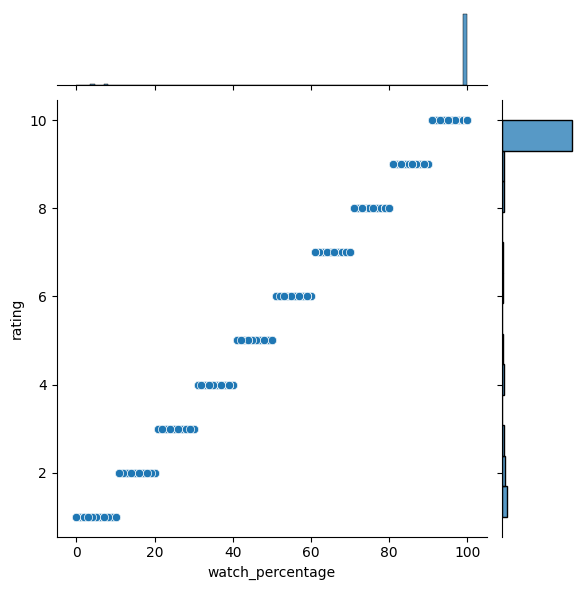

In [5]:
# Visulization
sns.jointplot(x='watch_percentage', y='rating', data=explict)

In [6]:
explict[['watch_percentage','rating']].corr()

,watch_percentage,rating
watch_percentage,1.000000,0.997903
rating,0.997903,1.000000


### nb_views vs rating relationship

In [8]:
user_item

,user_id,item_id,watch_percentage,created_at,rating,nb_views
0,224557,510,100,2018-09-28 16:18:29,10,1114.0
1,224293,510,100,2018-09-28 17:20:30,10,1114.0
2,224442,510,100,2018-10-01 20:11:35,10,1114.0
3,196845,510,7,2018-10-06 13:12:52,1,1114.0
4,265845,510,100,2018-10-10 21:17:26,10,1114.0
...,...,...,...,...,...,...
3654,605615,280150,100,2021-08-03 15:08:17,10,56.0
3655,566743,280151,100,2021-02-18 19:52:12,10,39.0
3656,566743,280152,100,2021-02-18 19:57:06,10,34.0
3657,537737,233766,95,2020-11-25 16:46:00,10,16.0


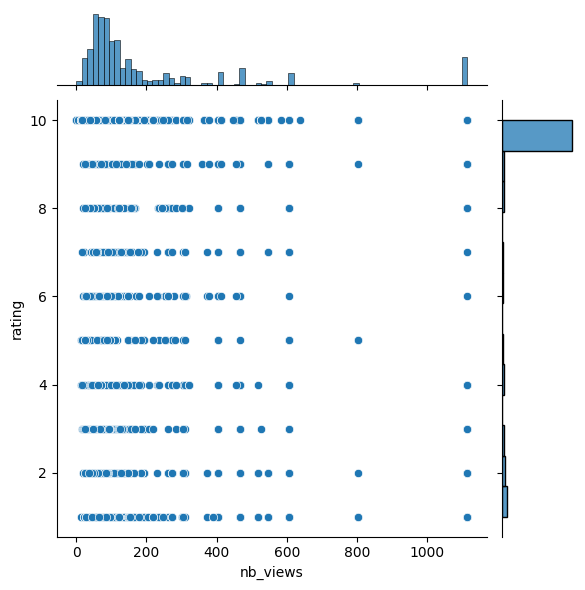

In [9]:
sns.jointplot(x='nb_views', y='rating', data=user_item)

### nb_rating vs rating relationship

In [10]:
agg_ratings = user_item.groupby('item_id').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()


In [11]:
agg_ratings.sort_values(by='number_of_ratings', ascending=False)

,item_id,mean_rating,number_of_ratings
0,510,8.865922,179
435,43457,8.596330,109
2,512,7.512821,78
256,7626,6.736842,76
36,733,8.333333,48
...,...,...,...
599,102214,10.000000,1
246,7113,10.000000,1
601,102216,10.000000,1
602,102219,7.000000,1


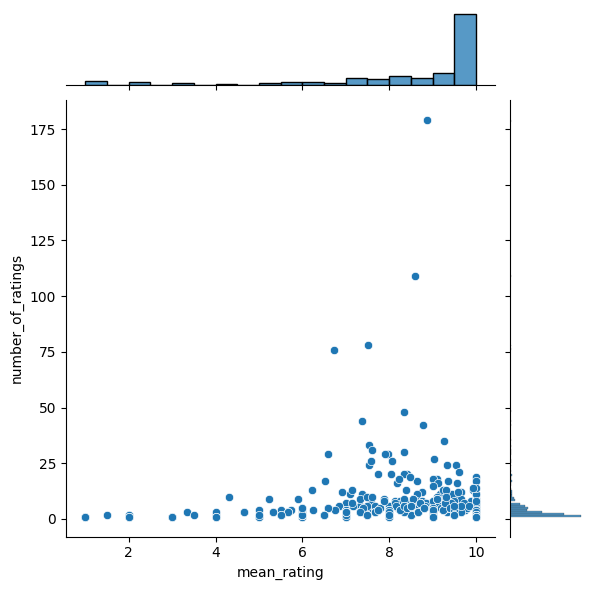

In [12]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings)

#### Nunmber of rating distribution

In [28]:
fig = go.Figure(go.Histogram(
    x=agg_ratings['number_of_ratings'].tolist(),
    
    bingroup=1))

fig.add_trace(go.Histogram(x=agg_ratings['number_of_ratings'].tolist(), name="count", texttemplate="%{x}", textfont_size=20))
fig.update_layout(title='Nunmber of rating distribution')


fig.update_layout(
    barmode="overlay",
    bargap=0.1)
fig.show()


### number watching vs number rating

In [8]:
item_ratings = user_item.groupby('item_id').agg(mean_rating = ('rating', 'mean'),
                                                nb_item_ratings = ('rating', 'count')).reset_index()


NameError: name 'user_item' is not defined

In [9]:
user_rating = user_item.groupby('user_id').agg(
                                                nb_user_ratings = ('rating', 'count')).reset_index()


NameError: name 'user_item' is not defined

In [75]:
user_item_rating = user_item[['user_id','item_id','nb_views','rating']].merge(user_rating, on='user_id', how='inner')
user_item_rating = user_item_rating.merge(item_ratings, on='item_id', how='inner')

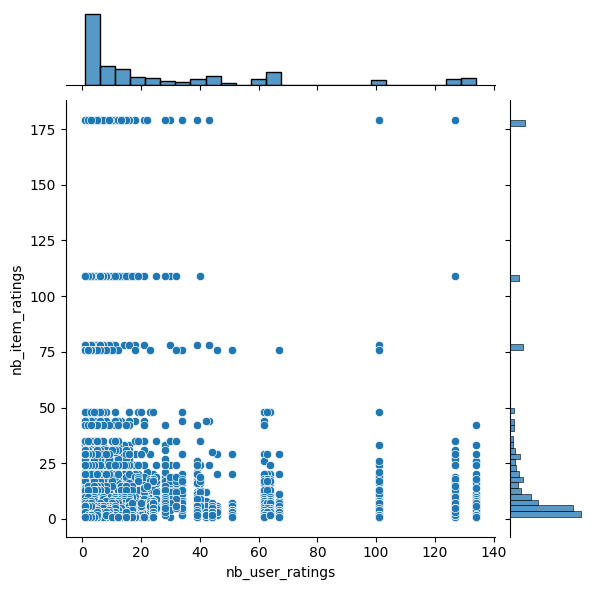

In [76]:
sns.jointplot(x='nb_user_ratings', y='nb_item_ratings', data=user_item_rating)

In [77]:
user_item_rating

,user_id,item_id,nb_views,rating,nb_user_ratings,mean_rating,nb_item_ratings
0,224557,510,1114.0,10,3,8.865922,179
1,224293,510,1114.0,10,3,8.865922,179
2,224442,510,1114.0,10,1,8.865922,179
3,196845,510,1114.0,1,1,8.865922,179
4,265845,510,1114.0,10,1,8.865922,179
...,...,...,...,...,...,...,...
3654,537737,233767,41.0,10,3,10.000000,1
3655,553215,1926,82.0,10,1,10.000000,1
3656,505727,1930,115.0,4,1,4.000000,1
3657,594589,12691,89.0,5,2,5.000000,1


## FE

### remove user that only rate movie which has 1 rate

In [5]:
user_rating_info = user_item_rating.groupby('user_id').agg({'nb_item_ratings':list}).reset_index()
user_rating_info['mean_items_rating'] = user_rating_info['nb_item_ratings'].apply(np.mean)

NameError: name 'user_item_rating' is not defined

In [ ]:
remove_user_id = user_rating_info[user_rating_info['mean_items_rating'] == 1].user_id.tolist()

In [ ]:
remove_user_id

[505727, 553215, 582499, 588915, 608098]

In [ ]:
user_item_filter = user_item_rating[~user_item_rating['user_id'].isin(remove_user_id)]

##  User-based cf

In [ ]:
# Create user-item matrix
matrix = user_item_filter.pivot_table(index='user_id', columns='item_id', values='rating')

user_similarity = matrix.T.corr()
user_similarity_cosine = cosine_similarity(matrix.fillna(0))

In [94]:
matrix

item_id,510,511,512,513,514,515,516,526,527,528,...,385088,385089,385090,385091,393125,393132,403215,403216,403217,403218
user_id,,,,,,,,,,,,,,,,,,,,,
672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4160,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
user_mtrx = matrix.reset_index()

In [97]:
user_mtrx

item_id,user_id,510,511,512,513,514,515,516,526,527,...,385088,385089,385090,385091,393125,393132,403215,403216,403217,403218
0,672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4160,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,607059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813,607339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,607825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815,608559,10.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
user_mtx_158 = user_mtrx[user_mtrx.user_id ==158057]

In [99]:
user_mtx_158.T.reset_index().dropna()

,item_id,38
0,user_id,158057.0
253,7626,2.0
590,70385,2.0
682,233779,10.0
683,233780,8.0


In [100]:
user_mtx_158.T.reset_index().dropna()

,item_id,38
0,user_id,158057.0
253,7626,2.0
590,70385,2.0
682,233779,10.0
683,233780,8.0


In [101]:
user_list = list(user_similarity.columns)
# Pick a user ID
lst_available_user = []
for user in user_list:
    picked_userid = user

    # Remove picked user ID from the candidate list
    user_similarity.drop(index=picked_userid, inplace=True)

    n = 10

    # User similarity threashold
    user_similarity_threshold = 0

    # Get top n similar users
    similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

    if len(similar_users) >0:
        lst_available_user.append(picked_userid)


### Recommendation

In [102]:
lst_available_user

[72760,
 90940,
 104074,
 108236,
 108551,
 116857,
 118583,
 124548,
 130811,
 139125,
 158057,
 174528,
 178475,
 188744,
 199220,
 200212,
 224293,
 224456,
 231976,
 234474,
 234863,
 239866,
 244696,
 251627,
 259021,
 259390,
 261939,
 261957,
 266244,
 266617,
 266810,
 268171,
 268930,
 269190,
 274455,
 275095,
 275125,
 275485,
 276596,
 277123,
 277485,
 277945,
 279337,
 279350,
 282951,
 283584,
 284292,
 284337,
 284350,
 287022,
 287108,
 287456,
 290836,
 293030,
 293955,
 294740,
 295175,
 295446,
 296050,
 297418,
 297517,
 297767,
 304895,
 304909,
 304984,
 307569,
 307578,
 307924,
 319053,
 364072,
 378317,
 378434,
 402627,
 403297,
 404518,
 427887,
 428176,
 456130,
 459702,
 460964,
 460979,
 465202,
 465203,
 478193,
 478592,
 482270,
 482862,
 483016,
 487785,
 488565,
 490079,
 490960,
 490982,
 493618,
 493749,
 493859,
 494102,
 502596,
 504458,
 512249,
 512922,
 533953,
 537486,
 537638,
 545083,
 554556,
 563179,
 567208,
 568714,
 597576,
 605132]

In [105]:
# Pick a user ID
picked_userid = 178475

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()

user_id,672,856,3928,4160,4448,65824,67244,72760,73173,74358,...,606703,606744,606765,606976,606992,607059,607339,607825,608559,610262
user_id,,,,,,,,,,,,,,,,,,,,,
672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# Number of similar users
n = 50

# User similarity threashold
user_similarity_threshold = 0

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 178475 are user_id
124548    1.0
295446    1.0
Name: 178475, dtype: float64


In [109]:
picked_userid_watched = matrix[matrix.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

item_id,510,43457,45205,52609
user_id,,,,
178475,10.0,6.0,1.0,10.0


In [110]:
similar_user_movies = matrix[matrix.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

item_id,510,511,512,540,545,555,743,745,789,802,...,15256,16366,16367,16368,16369,16370,43457,43458,43459,43460
user_id,,,,,,,,,,,,,,,,,,,,,
124548,4.0,2.0,NaN,2.0,3.0,10.0,1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
295446,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,10.0,10.0,7.0,10.0,9.0,10.0,10.0,10.0


In [111]:
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_movies

item_id,511,512,540,545,555,743,745,789,802,809,811,15256,16366,16367,16368,16369,16370,43458,43459,43460
user_id,,,,,,,,,,,,,,,,,,,,
124548,2.0,NaN,2.0,3.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295446,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,7.0,10.0,10.0,10.0,10.0


In [112]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])
    
# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,movie,movie_score
19,43460,10.0
12,16366,10.0
18,43459,10.0
4,555,10.0
17,43458,10.0
16,16370,10.0
14,16368,10.0
13,16367,10.0
1,512,10.0
15,16369,7.0


In [113]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]

# Print the average movie rating for user 1
print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')

The average movie rating for user 178475 is 6.75


In [114]:
# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating

# Take a look at the data
ranked_item_score.head(m)

,movie,movie_score,predicted_rating
19,43460,10.0,16.75
12,16366,10.0,16.75
18,43459,10.0,16.75
4,555,10.0,16.75
17,43458,10.0,16.75
16,16370,10.0,16.75
14,16368,10.0,16.75
13,16367,10.0,16.75
1,512,10.0,16.75
15,16369,7.0,13.75
